<a href="https://www.kaggle.com/code/glavianhcastelino/breast-cancer-ann-detection?scriptVersionId=125389915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Importing the required libraries


# Import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the data

In [3]:
# Load the data
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# Encode the target variable 'diagnosis'

In [4]:
# Drop the 'Unnamed: 32' column
data.drop(labels = 'Unnamed: 32', inplace=True,axis = 1)

# Encode the target variable 'diagnosis'
x = data.iloc[:,2:].values
y = data.iloc[:,1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing setsm

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

# Scale the data using StandardScaler

In [6]:
# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the model architecture and compile it

In [7]:
# Define the model architecture and compile it
model = Sequential()
model.add(Dense(16,activation='relu', input_shape = (30,)))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense( 1 , activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


# Train the model on the training set

In [8]:
# Train the model on the training set
model.fit(X_train, y_train, batch_size = 100, epochs = 150)

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.7817 - accuracy: 0.5938
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6504
Epoch 3/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.6738
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7422
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.8047
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.8301
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8848
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.9102
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.9023
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.9082
Epoch 11/150
6/6 [===========

# Predict on the test set and calculate confusion matrix

2/2 [==============================] - 0s 3ms/step


<AxesSubplot:>

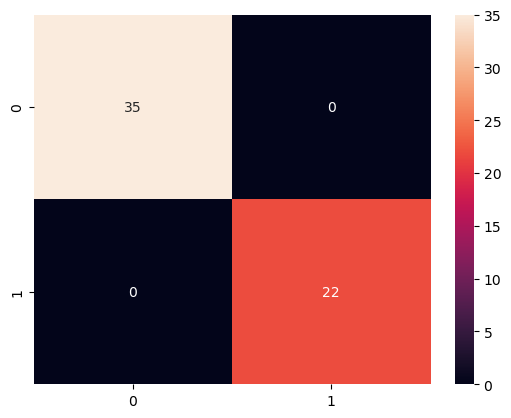

In [9]:
# Predict on the test set and calculate confusion matrix
pred = model.predict(X_test)
pred = (pred > 0.5)
cm = confusion_matrix(y_test,pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)